In [1]:
import keras

C:\Users\apple\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 64)        0      

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'Downloads/quotes/train'
validation_dir = 'Downloads/quotes/validation'

# rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,   # directory
        target_size=(150, 150),   # input shape (resized to 150x150)
        batch_size=20,
        class_mode='binary')      # binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 3842 images belonging to 2 classes.
Found 1288 images belonging to 2 classes.


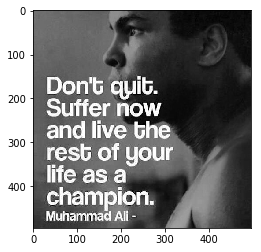

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# class 1

img1 = imread('Downloads/quotes/train/English_etc/13392816_2039379729619639_1907605806_n.jpg')
plt.imshow(img1)

plt.show()

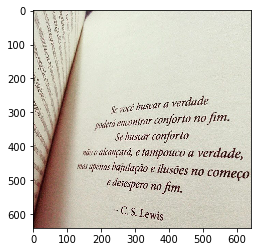

In [7]:
# class 1

img1 = imread('Downloads/quotes/train/English_etc/16463945_1227992607348607_3548141666558803968_n.jpg')
plt.imshow(img1)

plt.show()

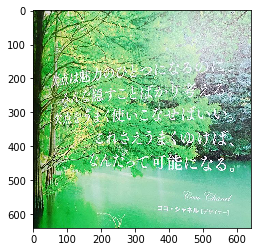

In [5]:
# class 2

img2 = imread('Downloads/quotes/train/Japanese/39665579_324694944943237_233050478873673728_n.jpg')
plt.imshow(img2)

plt.show()

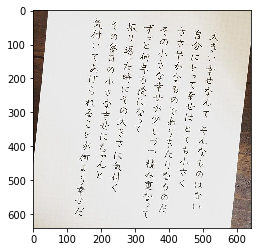

In [6]:
# class 2

img2 = imread('Downloads/quotes/train/Japanese/39754810_2151635061717568_2832167504173872391_n.jpg')
plt.imshow(img2)

plt.show()

In [5]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=192,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=64)

Epoch 1/20
192/192 [==============================] - 318s 2s/step - loss: 0.6411 - acc: 0.6190 - val_loss: 0.6720 - val_acc: 0.5602
Epoch 2/20
192/192 [==============================] - 316s 2s/step - loss: 0.6121 - acc: 0.6589 - val_loss: 0.6003 - val_acc: 0.6641
Epoch 3/20
192/192 [==============================] - 311s 2s/step - loss: 0.5728 - acc: 0.6966 - val_loss: 0.5800 - val_acc: 0.6805
Epoch 4/20
192/192 [==============================] - 308s 2s/step - loss: 0.5422 - acc: 0.7253 - val_loss: 0.5953 - val_acc: 0.6609
Epoch 5/20
192/192 [==============================] - 310s 2s/step - loss: 0.5208 - acc: 0.7266 - val_loss: 0.5136 - val_acc: 0.7484
Epoch 6/20
192/192 [==============================] - 309s 2s/step - loss: 0.4870 - acc: 0.7510 - val_loss: 0.4805 - val_acc: 0.7578
Epoch 7/20
192/192 [==============================] - 310s 2s/step - loss: 0.4662 - acc: 0.7630 - val_loss: 0.4706 - val_acc: 0.7836
Epoch 8/20
192/192 [==============================] - 313s 2s/step - 

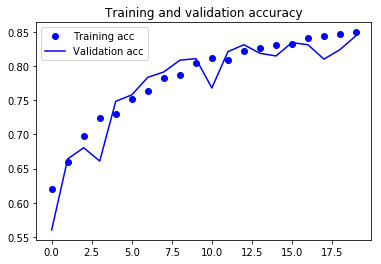

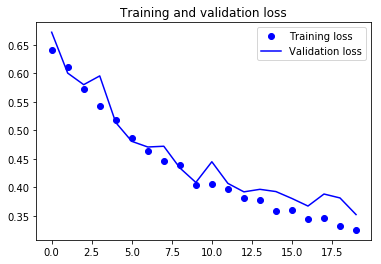

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
model.save('quotes')

In [1]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
model = load_model('quotes')

test_dir = 'downloads/quotes/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=64)
print('test loss:', test_loss)
print('test acc:', test_acc)

C:\Users\apple\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Found 1279 images belonging to 2 classes.
test loss: 0.3558684499399843
test acc: 0.8405003900449662
